# Predicting first order phase transition of a G-protein with `paysage`

In this notebook I'll show you the resulting Mean Energy and Variance (corresponding to the Heat Capacity) of fantasy contact maps of a G-protein, calculated with a trained Restricted Boltzman Machine constructed with `paysage` ( https://github.com/drckf/paysage.git ) .

### Model and method
Many proteins, like this one, has a first order thermodynamic transition due to a jump in entropy: they pass from a state more ordered to a state more disordered as the temperature increases. We can see this jump in entropy as a jump in the mean energy and a peak in the variance.

From every contact map, I calculate the energy of the single configuration as the sum over the contacts $c_i$ normalized over the total number of contacts $ C = 1540 $:
$$
E_j = -\frac{1}{C} \sum_{i=0}^C c_i,
$$
where $c_i = 1$ if the distance between residues i and j is smaller than a threshold (3.5 Angstrom in my case). In this way an energy equal to $-\frac{1}{C}$ is associated to every contact. 
The resulting mean energy then will be: 
$$
<E^{(k)}> = \frac{1}{N} \sum_{j=0}^N E_j^{(k)},
$$
where $k$ is an index that occurs over the distincts temperatures and $N$ is the total number of contact maps for a particular temperature. 
The Variance (proportional to the Heat Capacity via fluctuation-dissipation theorem) then will be:
$$
[\sigma^2]^{(k)} = <[E^{(k)}]^2> - [<E^{(k)}>]^2,
$$
and
$$
C_v \propto \frac{1}{[T^{(k)}]^2} [\sigma^2]^{(k)}.
$$
I repeat this calculation with contact maps with which I train the RBM (real-cmap) and the contact maps computed by the RBM (fantasy-cmap).

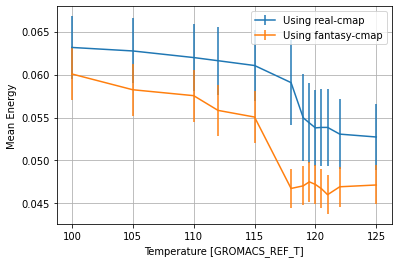

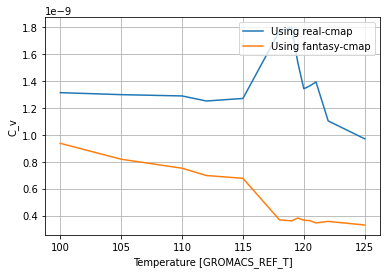

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load vectors with data
real_cmap_results = np.loadtxt("results/energy-vs-hc-real-cmap.dat")
real_cmap_results_sorted = real_cmap_results[real_cmap_results[:,0].argsort()]
real_cmap_variance = np.loadtxt("results/energy-vs-var-real-cmap.dat")
real_cmap_variance_sorted = real_cmap_variance[real_cmap_variance[:,0].argsort()]

temperature = real_cmap_results_sorted[:,0]

real_cmap_mean_energy = real_cmap_results_sorted[:,1]
real_cmap_heat_capacity = real_cmap_results_sorted[:,2]
real_cmap_std_dev = np.sqrt(real_cmap_variance_sorted[:,2])

fantasy_cmap_results = np.loadtxt("results/energy-vs-hc-fantasy-cmap.dat")
fantasy_cmap_results_sorted = fantasy_cmap_results[fantasy_cmap_results[:,0].argsort()]
fantasy_cmap_variance = np.loadtxt("results/energy-vs-var-fantasy-cmap.dat")
fantasy_cmap_variance_sorted = fantasy_cmap_variance[fantasy_cmap_variance[:,0].argsort()]

fantasy_cmap_mean_energy = fantasy_cmap_results_sorted[:,1]
fantasy_cmap_heat_capacity = fantasy_cmap_results_sorted[:,2]
fantasy_cmap_std_dev = np.sqrt(fantasy_cmap_variance_sorted[:,2])

# Plot Mean energy vs temperature
plt.errorbar(temperature, real_cmap_mean_energy, yerr=real_cmap_std_dev, label="Using real-cmap")
plt.errorbar(temperature, fantasy_cmap_mean_energy, yerr=fantasy_cmap_std_dev, label="Using fantasy-cmap")

plt.xlabel('Temperature [GROMACS_REF_T]') 
plt.ylabel('Mean Energy')
plt.grid(True)
plt.legend(loc="upper right")

# New figure for separated plots
plt.figure()

# Plot Variance vs temperature
plt.plot(temperature, real_cmap_heat_capacity,label="Using real-cmap")
plt.plot(temperature, fantasy_cmap_heat_capacity,label="Using fantasy-cmap")
plt.xlabel('Temperature [GROMACS_REF_T]') 
plt.ylabel('C_v')
plt.grid(True)
plt.legend(loc="upper right")

plt.show()